In [186]:
#import library required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import model_selection

In [187]:
#read data and drop ID which has no affects on this and check if data require clean
LifeExpectancyTrainFrame = pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/train.csv', sep = ',').drop('ID', axis = 1)
LifeExpectancyTrainFrame.head()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,67.1,146,2017,0,263,262,264,62,0.01,71.279624,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,59.8,146,2016,0,271,278,264,64,0.01,73.523582,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,57.6,146,2015,0,268,246,290,66,0.01,73.219243,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,55.5,146,2014,0,272,248,296,69,0.01,78.184215,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,57.7,146,2013,0,275,278,272,71,0.01,7.097109,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [188]:
#check if data has NaN value
pd.isna(LifeExpectancyTrainFrame).sum()

TARGET_LifeExpectancy           0
Country                         0
Year                            0
Status                          0
AdultMortality                  0
AdultMortality-Male             0
AdultMortality-Female           0
InfantDeaths                    0
Alcohol                         0
PercentageExpenditure           0
Measles                         0
BMI                             0
UnderFiveDeaths                 0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV-AIDS                        0
GDP                             0
Population                      0
Thinness1-19years               0
Thinness5-9years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

In [189]:
#assuming life expectancy surely not affected by country and year
#now try out the country and figure the relations
LifeExpectancyTrainFrame.groupby('Country').mean().head()

,TARGET_LifeExpectancy,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
0,62.61875,2009.5,0.0,174.1875,172.000,176.375,22.3125,0.310000,21.486426,3248.7500,...,75.4375,4.930000,78.3125,0.53125,307.564375,5.413843e+06,8.09375,7.98750,0.432563,2.658455
2,79.98125,2009.5,1.0,70.1875,69.250,71.125,0.2500,11.040625,2392.432657,81.5625,...,97.7500,6.107500,97.3125,0.10000,18945.141875,2.884043e+06,0.86250,0.85625,0.877750,4.094788
4,77.95000,2009.5,0.0,69.3750,67.500,71.250,1.0000,3.935000,972.359150,0.1875,...,69.9375,8.609375,79.7500,0.10000,4432.093750,2.309299e+06,1.96250,1.90625,0.736938,3.581276
5,54.90625,2009.5,0.0,279.3750,282.625,276.125,3.0000,7.332500,552.671538,294.5000,...,36.8750,2.902500,29.9375,5.13750,8850.700000,5.567653e+05,6.65625,6.60000,0.536188,2.792966
6,59.98750,2009.5,0.0,313.1875,309.750,316.625,2.8750,4.734375,359.930079,722.0625,...,78.5000,7.386250,83.5000,13.64375,3407.715625,1.025527e+06,10.70000,10.70625,0.588313,3.398453


LifeExpectancyTrainFrame.groupby('Country').max().head()

In [190]:
LifeExpectancyTrainFrame.groupby('Country').max().head()

,TARGET_LifeExpectancy,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
0,67.8,2017,0,252,258,256,27,0.36,96.037251,24789,...,93,5.68,94.0,0.7,866.73,14976994,12.3,12.3,0.491,3.082207
2,89.6,2017,1,99,96,102,1,12.60,7191.051507,576,...,99,9.60,99.0,0.1,54235.54,11274196,1.0,1.0,0.895,4.335897
4,80.3,2017,0,99,98,102,1,4.34,2568.237059,1,...,95,9.73,95.0,0.1,11183.61,4757575,2.4,2.3,0.775,3.768289
5,59.1,2017,0,344,360,346,3,11.89,1705.678619,1339,...,59,5.32,44.0,8.2,25471.47,1175389,9.8,9.8,0.592,3.033150
6,66.0,2017,0,483,478,488,3,7.99,796.873426,4076,...,92,8.93,92.0,24.7,6439.38,2425561,15.7,15.9,0.637,3.435113


In [191]:
LifeExpectancyTrainFrame.groupby('Country').min().head()

,TARGET_LifeExpectancy,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
0,57.5,2002,0,2,0,4,19,0.26,0.0,0,...,6,4.31,6.0,0.3,12.70,13391,1.0,1.1,0.378,2.280351
2,75.1,2002,1,1,0,2,0,10.05,0.0,0,...,96,1.17,95.0,0.1,2606.75,16257,0.8,0.8,0.861,3.962323
4,76.2,2002,0,1,0,2,1,3.34,0.0,0,...,8,7.12,9.0,0.1,434.97,46324,1.7,1.7,0.702,3.405877
5,48.9,2002,0,32,32,30,3,0.01,0.0,0,...,3,1.63,2.0,1.9,193.41,66647,1.0,1.0,0.000,0.000000
6,52.4,2002,0,36,34,38,2,0.01,0.0,0,...,8,6.11,77.0,2.1,63.81,21374,1.4,1.4,0.554,3.361547


In [192]:
LifeExpectancyTrainFrame.groupby('Country').median().head()

,TARGET_LifeExpectancy,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
0,63.05,2009.5,0.0,215.5,211.0,220.0,22.0,0.32,9.257874,39.0,...,84.5,4.81,88.5,0.55,159.805,1385187.0,10.45,9.80,0.4300,2.636132
2,78.90,2009.5,1.0,83.0,81.0,82.0,0.0,11.01,687.148507,45.5,...,98.0,8.29,98.0,0.10,5118.370,1398635.0,0.80,0.80,0.8770,4.031124
4,77.80,2009.5,0.0,96.0,94.0,98.0,1.0,4.09,935.602316,0.0,...,89.0,8.45,89.0,0.10,4563.575,2206647.5,1.90,1.85,0.7370,3.584683
5,55.40,2009.5,0.0,336.0,335.0,330.0,3.0,7.19,216.285688,21.0,...,43.5,2.50,36.5,5.10,2797.225,667186.5,8.65,8.65,0.5810,3.008310
6,62.05,2009.5,0.0,308.0,312.0,304.0,3.0,5.09,331.470990,237.0,...,83.0,7.20,83.0,13.45,3842.385,267824.5,11.75,11.70,0.5835,3.398521


<Figure size 432x288 with 0 Axes>

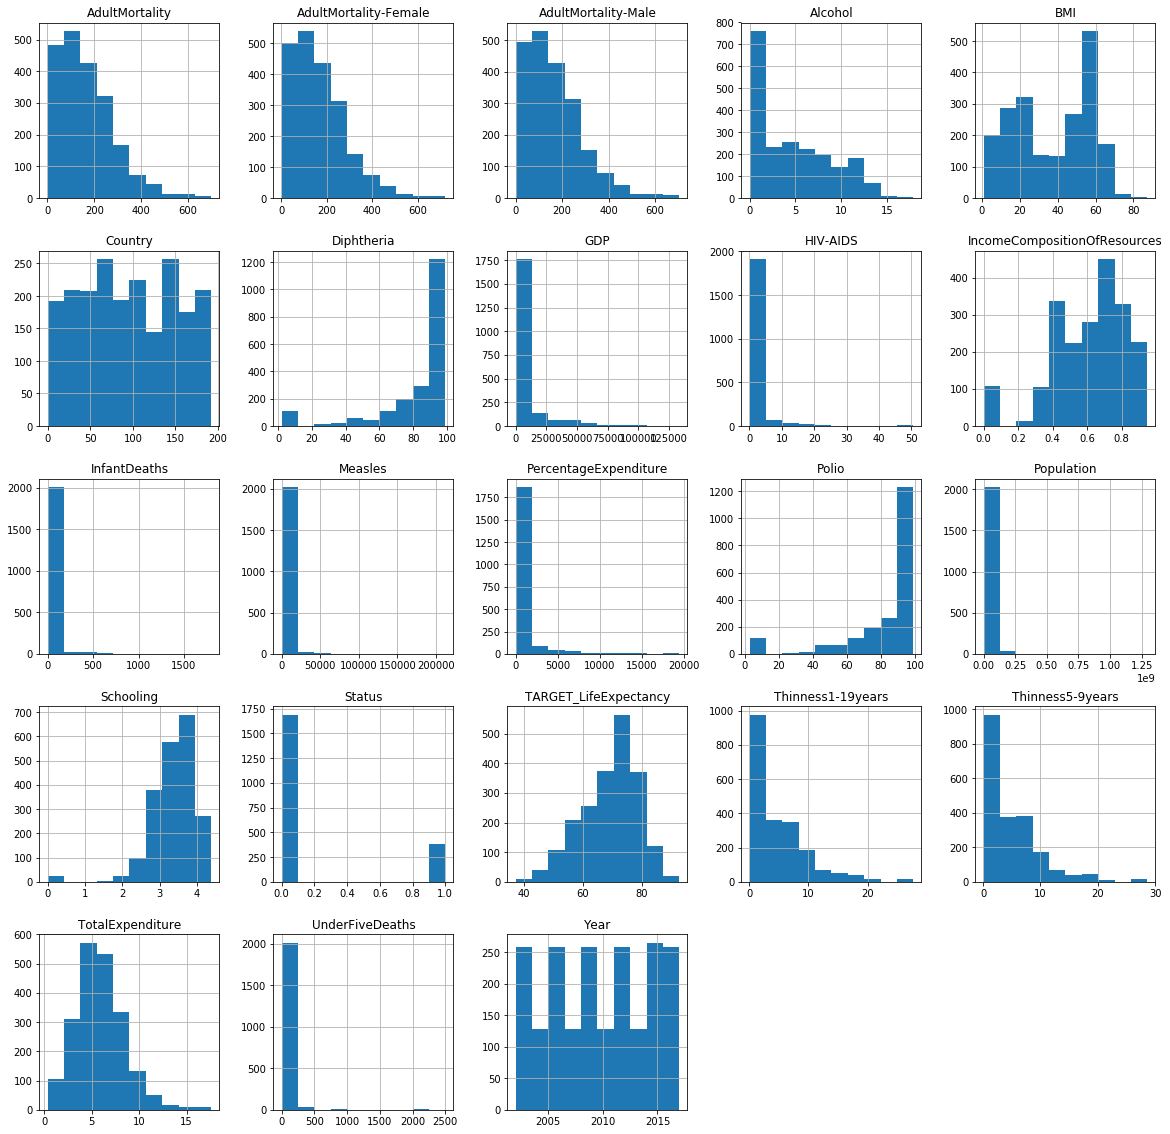

In [193]:
#get more information using histgram
plt.figure()
LifeExpectancyTrainFrame.hist(figsize = (20, 20))
plt.savefig('histgram.jpeg')#save the diagram
plt.show()

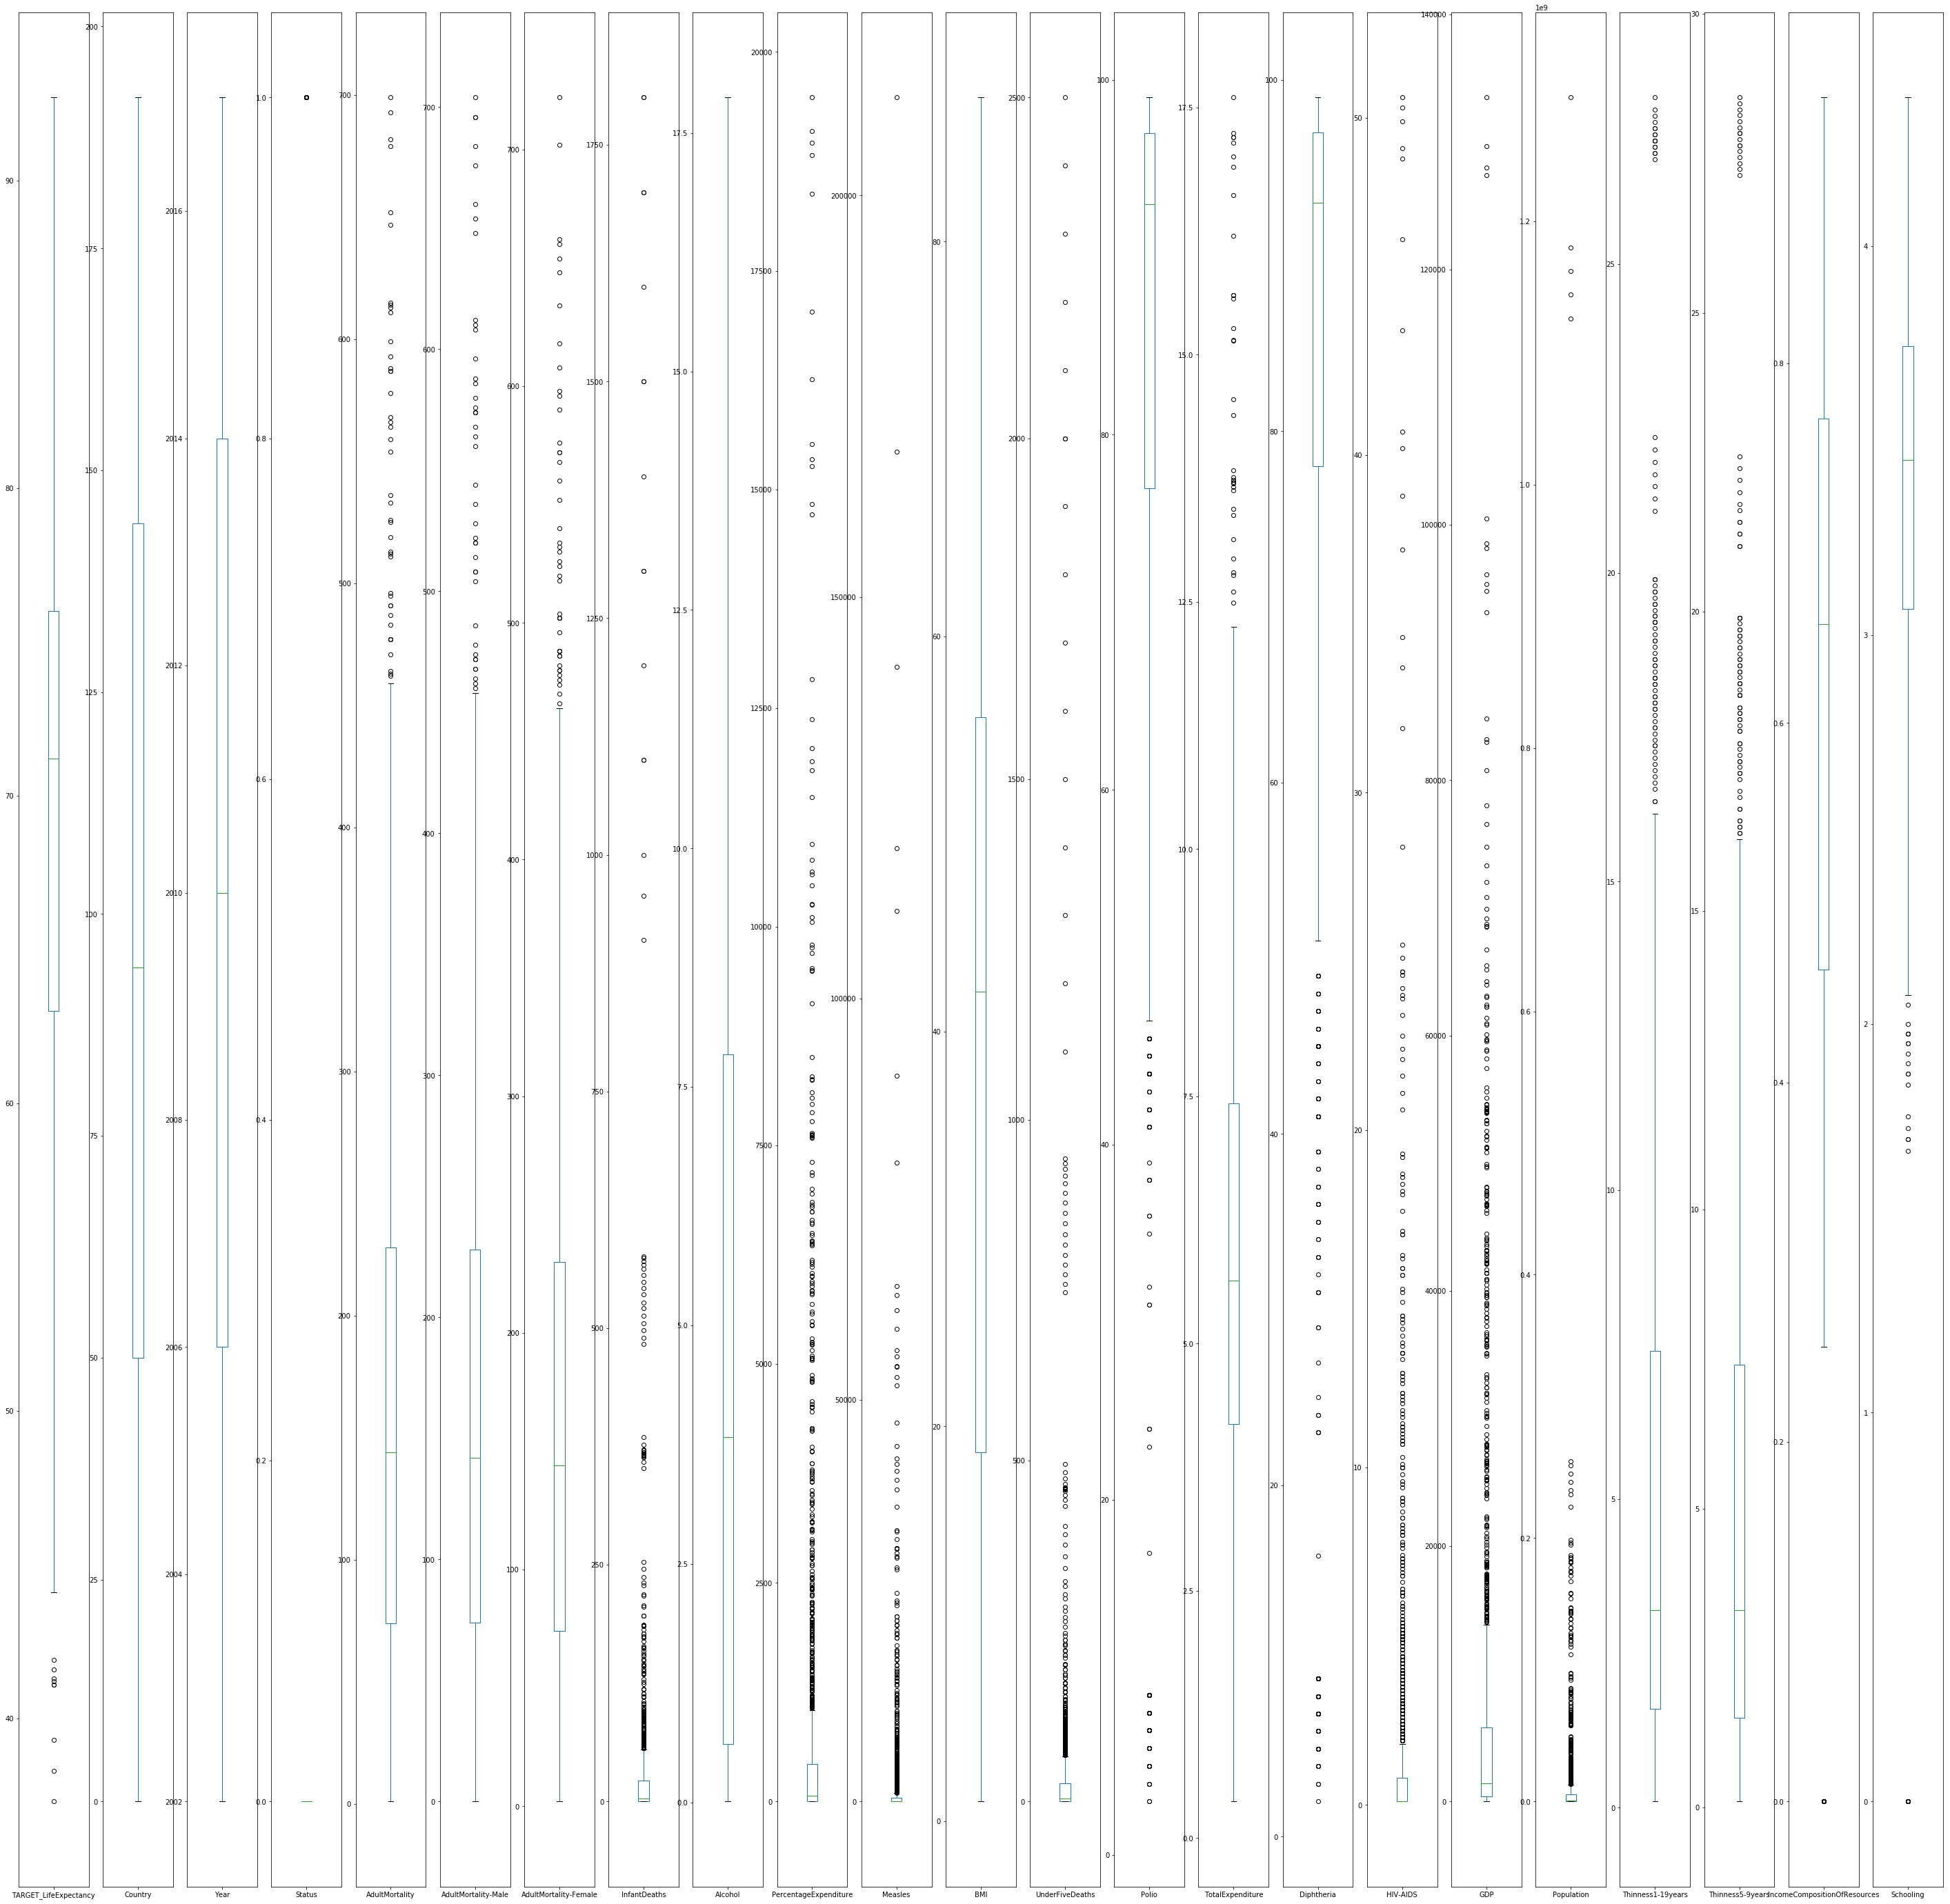

In [248]:
#get more information using box
LifeExpectancyTrainFrame.plot(kind = 'box', subplots = True,
                              sharex = False, sharey = False, figsize = (50, 50))
plt.show()

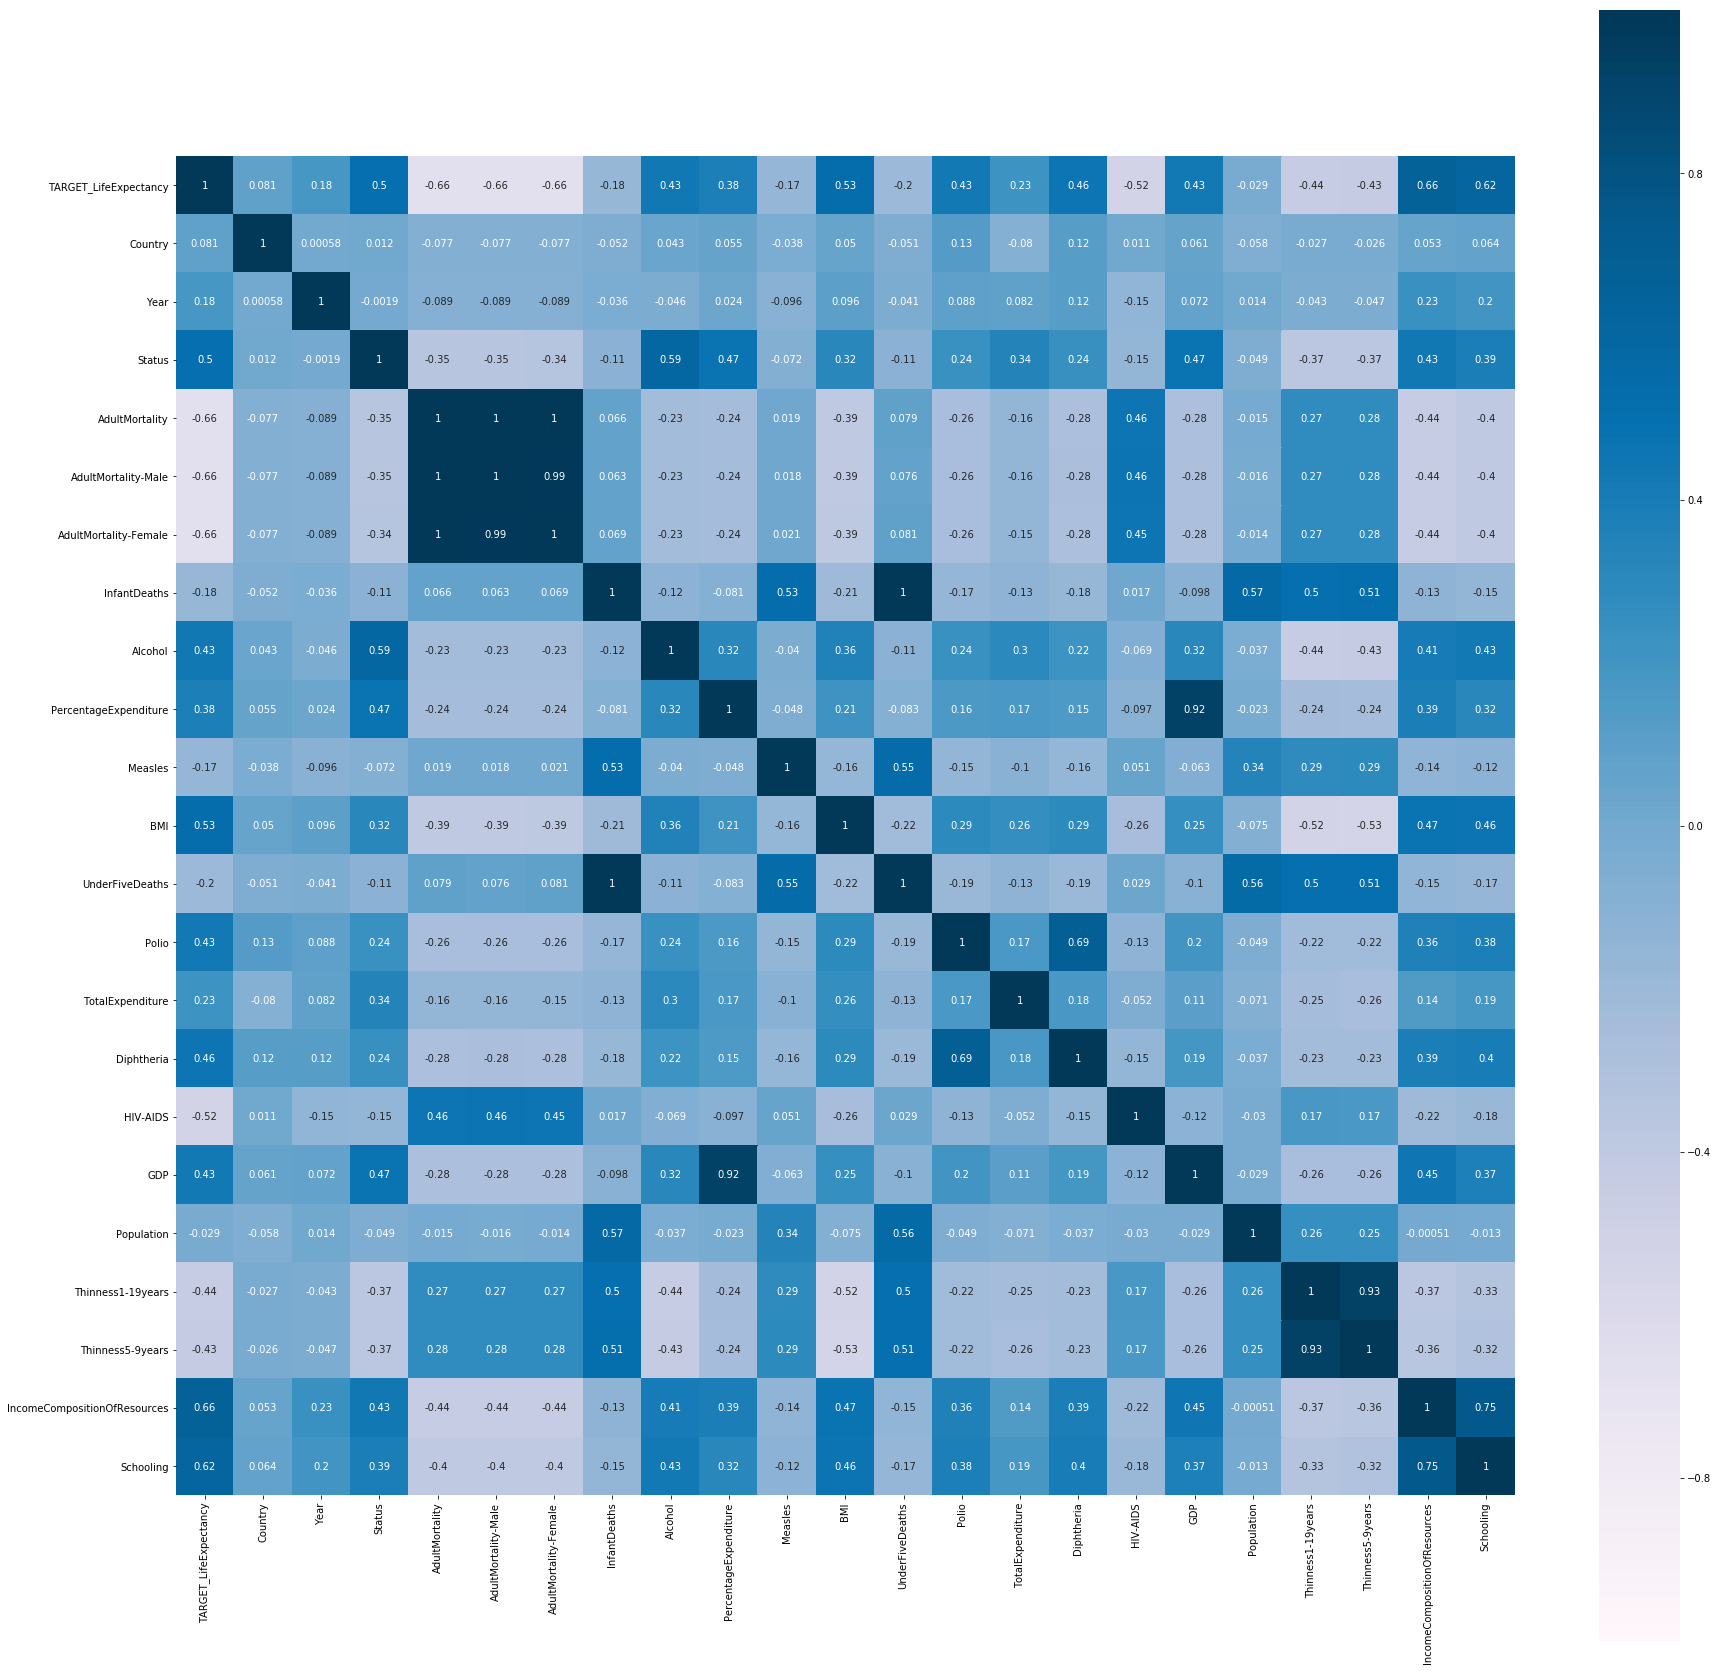

In [195]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(LifeExpectancyTrainFrame.corr(), cmap = "PuBu", center = 0,
            vmin = -1, vmax = 1, square = True, annot = True)
b, t = plt.ylim() # discover the values for bottom and top
plt.savefig('heatmap.jpeg')#save the diagram
plt.show()

In [196]:
#check all features for scatter plot which will clearly identify the relations
LifeExpectancyTrainFrame.columns

Index(['TARGET_LifeExpectancy', 'Country', 'Year', 'Status', 'AdultMortality',
       'AdultMortality-Male', 'AdultMortality-Female', 'InfantDeaths',
       'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness1-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

In [197]:
lifeExpectancy = LifeExpectancyTrainFrame.TARGET_LifeExpectancy #assign life expectancy
#country and year clearly has no relations, thus not going to display

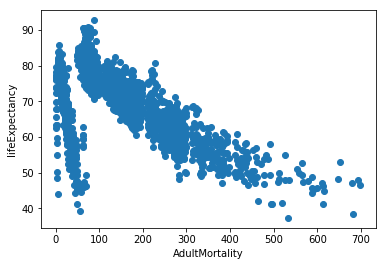

In [198]:
plt.scatter(LifeExpectancyTrainFrame.AdultMortality, lifeExpectancy)
plt.xlabel('AdultMortality')
plt.ylabel('lifeExpectancy')
plt.savefig('AdultMortality.jpeg')#save the diagram
plt.show()

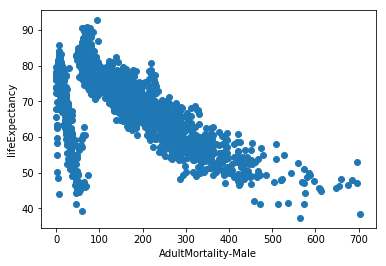

In [199]:
plt.scatter(LifeExpectancyTrainFrame['AdultMortality-Male'], lifeExpectancy)
plt.xlabel('AdultMortality-Male')
plt.ylabel('lifeExpectancy')
plt.savefig('AdultMortality-Male.jpeg')#save the diagram
plt.show()

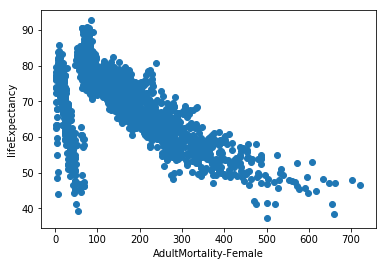

In [200]:
plt.scatter(LifeExpectancyTrainFrame['AdultMortality-Female'], lifeExpectancy)
plt.xlabel('AdultMortality-Female')
plt.ylabel('lifeExpectancy')
plt.savefig('AdultMortality-Female.jpeg')#save the diagram
plt.show()

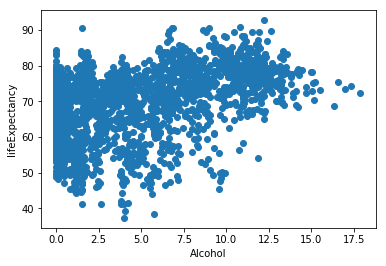

In [201]:
plt.scatter(LifeExpectancyTrainFrame['Alcohol'], lifeExpectancy)
plt.xlabel('Alcohol')
plt.ylabel('lifeExpectancy')
plt.show()

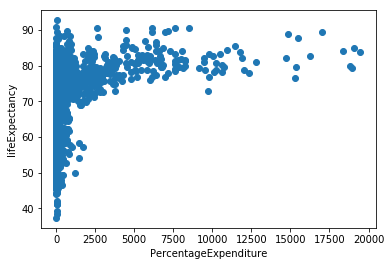

In [202]:
plt.scatter(LifeExpectancyTrainFrame['PercentageExpenditure'], lifeExpectancy)
plt.xlabel('PercentageExpenditure')
plt.ylabel('lifeExpectancy')
plt.savefig('PercentageExpenditure.jpeg')#save the diagram
plt.show()

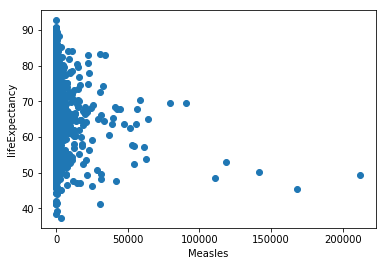

In [203]:
plt.scatter(LifeExpectancyTrainFrame['Measles'], lifeExpectancy)
plt.xlabel('Measles')
plt.ylabel('lifeExpectancy')
plt.savefig('Measles.jpeg')#save the diagram
plt.show()

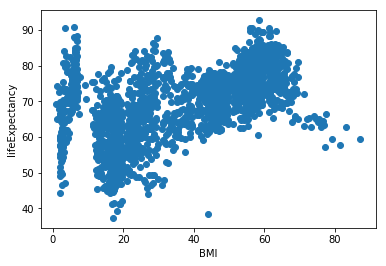

In [204]:
plt.scatter(LifeExpectancyTrainFrame['BMI'], lifeExpectancy)
plt.xlabel('BMI')
plt.ylabel('lifeExpectancy')
plt.savefig('BMI.jpeg')#save the diagram
plt.show()

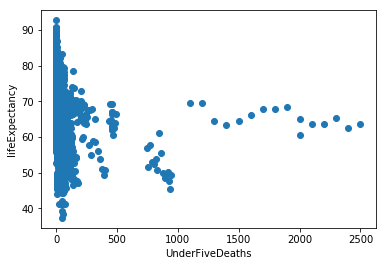

In [205]:
plt.scatter(LifeExpectancyTrainFrame['UnderFiveDeaths'], lifeExpectancy)
plt.xlabel('UnderFiveDeaths')
plt.ylabel('lifeExpectancy')
plt.show()

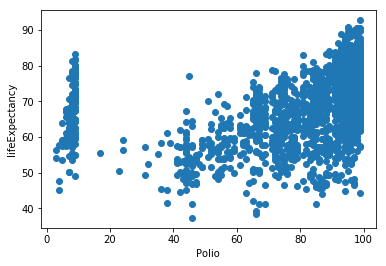

In [206]:
plt.scatter(LifeExpectancyTrainFrame['Polio'], lifeExpectancy)
plt.xlabel('Polio')
plt.ylabel('lifeExpectancy')
plt.show()


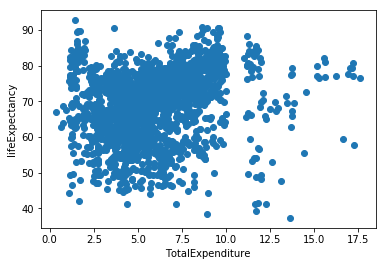

In [207]:
plt.scatter(LifeExpectancyTrainFrame['TotalExpenditure'], lifeExpectancy)
plt.xlabel('TotalExpenditure')
plt.ylabel('lifeExpectancy')
plt.savefig('TotalExpenditure.jpeg')#save the diagram
plt.show()

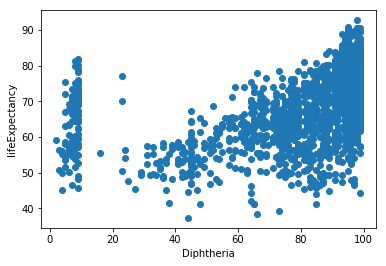

In [208]:
plt.scatter(LifeExpectancyTrainFrame['Diphtheria'], lifeExpectancy)
plt.xlabel('Diphtheria')
plt.ylabel('lifeExpectancy')
plt.savefig('Diphtheria.jpeg')#save the diagram
plt.show()

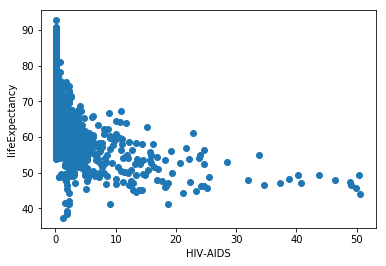

In [209]:
plt.scatter(LifeExpectancyTrainFrame['HIV-AIDS'], lifeExpectancy)
plt.xlabel('HIV-AIDS')
plt.ylabel('lifeExpectancy')
plt.savefig('HIV-AIDS.jpeg')#save the diagram
plt.show()

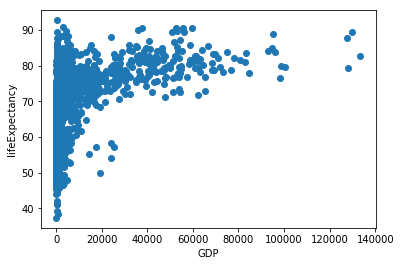

In [210]:
plt.scatter(LifeExpectancyTrainFrame['GDP'], lifeExpectancy)
plt.xlabel('GDP')
plt.ylabel('lifeExpectancy')
plt.savefig('GDP.jpeg')#save the diagram
plt.show()

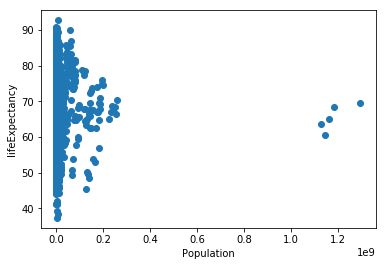

In [211]:
plt.scatter(LifeExpectancyTrainFrame['Population'], lifeExpectancy)
plt.xlabel('Population')
plt.ylabel('lifeExpectancy')
plt.show()

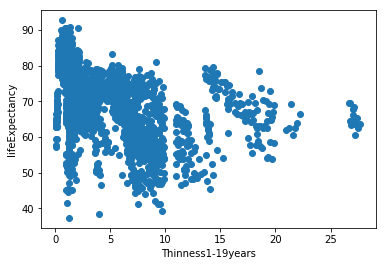

In [212]:
plt.scatter(LifeExpectancyTrainFrame['Thinness1-19years'], lifeExpectancy)
plt.xlabel('Thinness1-19years')
plt.ylabel('lifeExpectancy')
plt.savefig('Thinness1-19years.jpeg')#save the diagram
plt.show()

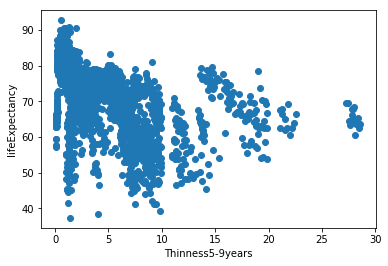

In [213]:
plt.scatter(LifeExpectancyTrainFrame['Thinness5-9years'], lifeExpectancy)
plt.xlabel('Thinness5-9years')
plt.ylabel('lifeExpectancy')
plt.savefig('Thinness5-9years.jpeg')#save the diagram
plt.show()

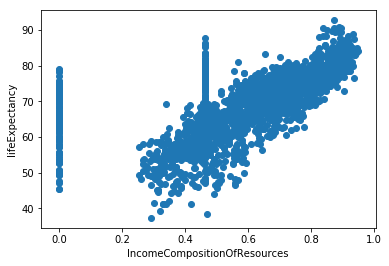

In [214]:
plt.scatter(LifeExpectancyTrainFrame['IncomeCompositionOfResources'], lifeExpectancy)
plt.xlabel('IncomeCompositionOfResources')
plt.ylabel('lifeExpectancy')
plt.savefig('IncomeCompositionOfResources.jpeg')#save the diagram
plt.show()

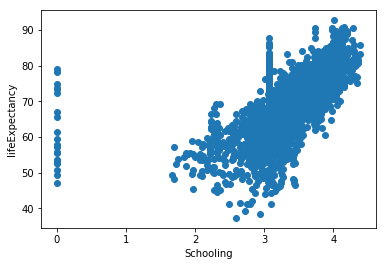

In [215]:
plt.scatter(LifeExpectancyTrainFrame['Schooling'], lifeExpectancy)
plt.xlabel('Schooling')
plt.ylabel('lifeExpectancy')
plt.savefig('Schooling.jpeg')#save the diagram
plt.show()

In [216]:
#build linear regression model
X = LifeExpectancyTrainFrame.drop('TARGET_LifeExpectancy', axis = 1)
Y = LifeExpectancyTrainFrame.TARGET_LifeExpectancy

In [217]:
#create testing and training data for life expectancy variable
trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size = 0.2)

In [218]:
#set up linear regression model
linReg = linear_model.LinearRegression()
linReg.fit(trainX, trainY)
predLifeExpentancy = linReg.predict(testX)

In [219]:
#check the result
print('Coefficients: \n', linReg.coef_)
print('Mean squared error: ', mean_squared_error(testY, predLifeExpentancy))
print('R-square score: ', r2_score(testY, predLifeExpentancy))

Coefficients: 
 [ 3.93944132e-03  4.06088205e-02  2.36171735e+00 -6.83639746e-03
 -1.85048233e-03 -1.18223126e-02  8.91887672e-02  1.84945606e-01
  6.45707335e-05 -1.16653852e-05  3.12650852e-02 -6.66526428e-02
  1.93028200e-02 -3.76302149e-02  3.40536860e-02 -5.01428281e-01
  3.66669490e-05 -2.54076028e-10 -1.00431307e-01 -6.78536099e-03
  6.92170990e+00  2.17024648e+00]
Mean squared error:  21.82832053712976
R-square score:  0.7790161332465597


In [220]:
#Now try Polynomial regression with degree 2
polyFeat = PolynomialFeatures(degree = 2, include_bias = True)
polyTrainX = polyFeat.fit_transform(trainX)
polyTestX = polyFeat.fit_transform(testX)
linReg.fit(polyTrainX, trainY)
predLifeExpentancy = linReg.predict(polyTestX)

In [221]:
#check the result
print('Coefficients: \n', linReg.coef_)
print('Mean squared error: ', mean_squared_error(testY, predLifeExpentancy))
print('R-square score: ', r2_score(testY, predLifeExpentancy))

Coefficients: 
 [-2.49493967e-04 -2.31720198e-04  5.15413031e-08  8.01872437e-07
  1.96492582e-05  1.93112172e-05  1.99677051e-05  2.85798532e-05
 -2.27270513e-07  2.80236879e-05  4.36930393e-05 -3.08308744e-06
  3.87721201e-05 -5.13109750e-06 -6.42522464e-07 -8.56681017e-06
  3.54989006e-07 -2.01030636e-04  2.48218200e-06 -3.90179877e-07
 -6.16393820e-07  2.27677752e-06  6.27887634e-07 -4.93362018e-05
  4.81684651e-05 -2.29877329e-03 -1.16158398e-05 -1.16159723e-05
 -1.16157072e-05 -8.49369175e-04 -5.45570563e-04  1.89446525e-06
  2.33167852e-06 -4.25200315e-04  5.77422544e-04  1.12101512e-04
  4.29086430e-05 -1.65580040e-04 -1.81522048e-03  1.74858437e-07
  1.42908779e-10 -4.68788191e-04 -1.31469580e-03 -3.97978416e-03
 -1.39315639e-02  1.49975296e-05  1.69865345e-03  1.28364583e-05
 -7.25547752e-05  9.82276923e-05  9.24406067e-05  1.85125395e-04
  1.48528374e-06 -7.97674590e-07  4.21083287e-05 -7.24018532e-05
 -7.23390833e-05 -3.76189537e-04 -6.69517165e-06 -7.53424644e-04
  2.49481

In [222]:
#Now try Polynomial regression with degree 3
polyFeat = PolynomialFeatures(degree = 3, include_bias = True)
polyTrainX = polyFeat.fit_transform(trainX)
polyTestX = polyFeat.fit_transform(testX)
linReg.fit(polyTrainX, trainY)
predLifeExpentancy = linReg.predict(polyTestX)

In [223]:
#check the result
print('Coefficients: \n', linReg.coef_)
print('Mean squared error: ', mean_squared_error(testY, predLifeExpentancy))
print('R-square score: ', r2_score(testY, predLifeExpentancy))

Coefficients: 
 [ 9.32605129e-12 -1.20076301e-17 -3.95538280e-16 ...  7.84143347e-22
  3.12826434e-21  1.15229638e-20]
Mean squared error:  20030.02014158709
R-square score:  -201.7783720010934


In [224]:
#we choose the first regression
linReg = linear_model.LinearRegression()
linReg.fit(trainX, trainY)
predLifeExpentancy = linReg.predict(testX)

In [225]:
from sklearn import model_selection
number_splits = 10
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True)

Text(0, 0.5, 'Average MSE')

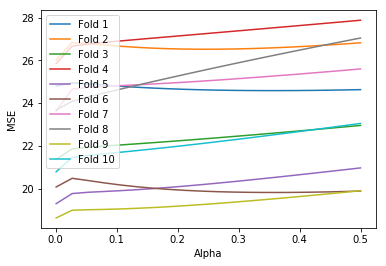

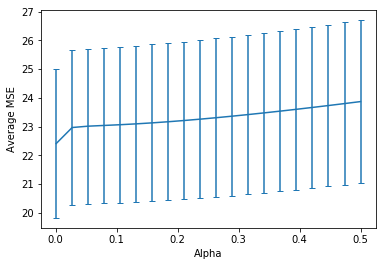

In [226]:
lRegPara = np.linspace(0.001,.5,num=20)

plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
alphaList = []

for trainIndex, validIndex in kFold.split(X):
    # Get the training and validation data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])
    
    for j , regPara in enumerate(lRegPara):
        ridgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        ridgeReg.fit(trainX, trainY)
        predY = ridgeReg.predict(validX)
        mse = mean_squared_error(validY, predY)
        lResults[nsplit, j] = (mse)

    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")

In [227]:
ridgeReg = linear_model.Ridge(alpha = 0.01, normalize = True)
ridgeReg.fit(trainX, trainY)
predY = ridgeReg.predict(testX)
mse = mean_squared_error(testY, predY)

print("MSE : ", mse)
print('R-square: ', r2_score(testY, predY))

MSE :  22.248315255568425
R-square:  0.7747642231310414


MSE :  25.41812380147538
R-square:  0.70918676635527


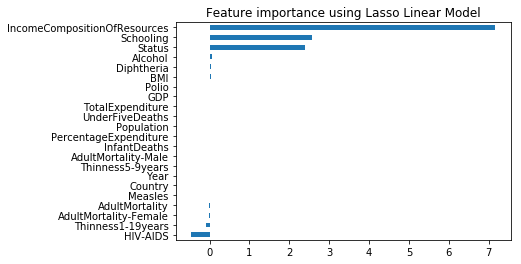

In [228]:
trainX, validX, trainY, validY = model_selection.train_test_split(X, Y, test_size = 0.20)
LassoReg = linear_model.Lasso(alpha = 0.01, normalize = True)
LassoReg.fit(trainX, trainY)

predY = LassoReg.predict(validX)
print("MSE : ", mean_squared_error(validY, predY))
print('R-square: ', r2_score(validY, predY))

coef = pd.Series(np.squeeze(LassoReg.coef_), index = X.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Linear Model")
plt.show()

In [229]:
#compare two using same splited dataset
trainX, validX, trainY, validY = model_selection.train_test_split(X, Y, test_size = 0.20)

#testing using Lasso
LassoReg = linear_model.Lasso(alpha = 0.01, normalize = True)
LassoReg.fit(trainX, trainY)

predY = LassoReg.predict(validX)
print(LassoReg.coef_)

print("MSE : ", mean_squared_error(validY, predY))
print('R-square: ', r2_score(validY, predY))

#testing using ridge
ridgeReg = linear_model.Ridge(alpha = 0.01, normalize = True)
ridgeReg.fit(trainX, trainY)
predY = ridgeReg.predict(validX)

print(ridgeReg.coef_)
print("MSE : ", mean_squared_error(validY, predY))
print('R-square: ', r2_score(validY, predY))


[ 0.00000000e+00  0.00000000e+00  2.41197288e+00 -8.89731545e-03
 -0.00000000e+00 -1.20927587e-02 -0.00000000e+00  1.10215760e-01
  0.00000000e+00 -0.00000000e+00  3.43781928e-02 -0.00000000e+00
  1.98670301e-02  0.00000000e+00  2.86130057e-02 -4.39072658e-01
  2.01102160e-05 -0.00000000e+00 -7.90852925e-02 -0.00000000e+00
  7.39553410e+00  2.43204180e+00]
MSE :  27.33027335744529
R-square:  0.6746432066432029
[ 1.88130100e-03  5.14685222e-02  2.54381836e+00 -7.15229791e-03
 -3.92964702e-03 -1.03561986e-02  1.43270345e-02  1.63384225e-01
  2.11772178e-05 -2.72470253e-05  3.63995641e-02 -1.11284296e-02
  2.48405957e-02  1.51805034e-02  3.20187229e-02 -4.84109693e-01
  3.11781447e-05  1.80930789e-09 -9.74708594e-02  1.03489808e-02
  6.61729391e+00  2.45423581e+00]
MSE :  25.668335985512392
R-square:  0.6944279562144913


In [230]:
#start predict the test
LifeExpectancyTestFrame = pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/test.csv', sep = ',').drop('ID',axis = 1)
LassoReg.fit(X, Y)
predY = LassoReg.predict(LifeExpectancyTestFrame)
df = pd.DataFrame(data = predY, columns = ['TARGET_LifeExpectancy'])
df.to_csv(r'output.csv' ,index = True)